# importing libraries

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# reading the dataset

In [46]:
data=pd.read_csv('car_insurance_claim.csv')
data.head()

,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,63581743,0,16MAR39,60.0,0,11.0,"$67,349",No,$0,z_No,...,Minivan,yes,"$4,461",2,No,3,$0,18.0,0,Highly Urban/ Urban
1,132761049,0,21JAN56,43.0,0,11.0,"$91,449",No,"$257,252",z_No,...,Minivan,yes,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban
2,921317019,0,18NOV51,48.0,0,11.0,"$52,881",No,$0,z_No,...,Van,yes,$0,0,No,2,$0,10.0,0,Highly Urban/ Urban
3,727598473,0,05MAR64,35.0,1,10.0,"$16,039",No,"$124,191",Yes,...,z_SUV,no,"$38,690",2,No,3,$0,10.0,0,Highly Urban/ Urban
4,450221861,0,05JUN48,51.0,0,14.0,NaN,No,"$306,251",Yes,...,Minivan,yes,$0,0,No,0,$0,6.0,0,Highly Urban/ Urban


In [47]:
data.columns

Index(['ID', 'KIDSDRIV', 'BIRTH', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME',
       'PARENT1', 'HOME_VAL', 'MSTATUS', 'GENDER', 'EDUCATION', 'OCCUPATION',
       'TRAVTIME', 'CAR_USE', 'BLUEBOOK', 'TIF', 'CAR_TYPE', 'RED_CAR',
       'OLDCLAIM', 'CLM_FREQ', 'REVOKED', 'MVR_PTS', 'CLM_AMT', 'CAR_AGE',
       'CLAIM_FLAG', 'URBANICITY'],
      dtype='object')

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          10302 non-null  int64  
 1   KIDSDRIV    10302 non-null  int64  
 2   BIRTH       10302 non-null  object 
 3   AGE         10295 non-null  float64
 4   HOMEKIDS    10302 non-null  int64  
 5   YOJ         9754 non-null   float64
 6   INCOME      9732 non-null   object 
 7   PARENT1     10302 non-null  object 
 8   HOME_VAL    9727 non-null   object 
 9   MSTATUS     10302 non-null  object 
 10  GENDER      10302 non-null  object 
 11  EDUCATION   10302 non-null  object 
 12  OCCUPATION  9637 non-null   object 
 13  TRAVTIME    10302 non-null  int64  
 14  CAR_USE     10302 non-null  object 
 15  BLUEBOOK    10302 non-null  object 
 16  TIF         10302 non-null  int64  
 17  CAR_TYPE    10302 non-null  object 
 18  RED_CAR     10302 non-null  object 
 19  OLDCLAIM    10302 non-nul

In [49]:
data.columns

Index(['ID', 'KIDSDRIV', 'BIRTH', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME',
       'PARENT1', 'HOME_VAL', 'MSTATUS', 'GENDER', 'EDUCATION', 'OCCUPATION',
       'TRAVTIME', 'CAR_USE', 'BLUEBOOK', 'TIF', 'CAR_TYPE', 'RED_CAR',
       'OLDCLAIM', 'CLM_FREQ', 'REVOKED', 'MVR_PTS', 'CLM_AMT', 'CAR_AGE',
       'CLAIM_FLAG', 'URBANICITY'],
      dtype='object')

In [50]:

#remove dollar sign from income, home_val, old_claim and claim amt
data['CLM_AMT']=data['CLM_AMT'].str.replace('$','')
data['CLM_AMT']=data['CLM_AMT'].str.replace(',','')
data['CLM_AMT']=data['CLM_AMT'].astype(float)

data['OLDCLAIM']=data['OLDCLAIM'].str.replace('$','')
data['OLDCLAIM']=data['OLDCLAIM'].str.replace(',','')
data['OLDCLAIM']=data['OLDCLAIM'].astype(float)

data['INCOME']=data['INCOME'].str.replace('$','')
data['INCOME']=data['INCOME'].str.replace(',','')
data['INCOME']=data['INCOME'].astype(float)

data['HOME_VAL']=data['HOME_VAL'].str.replace('$','')
data['HOME_VAL']=data['HOME_VAL'].str.replace(',','')
data['HOME_VAL']=data['HOME_VAL'].astype(float)

data['BLUEBOOK']=data['BLUEBOOK'].str.replace('$','')
data['BLUEBOOK']=data['BLUEBOOK'].str.replace(',','')
data['BLUEBOOK']=data['BLUEBOOK'].astype(float)

In [51]:
data

,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,63581743,0,16MAR39,60.0,0,11.0,67349.0,No,0.0,z_No,...,Minivan,yes,4461.0,2,No,3,0.0,18.0,0,Highly Urban/ Urban
1,132761049,0,21JAN56,43.0,0,11.0,91449.0,No,257252.0,z_No,...,Minivan,yes,0.0,0,No,0,0.0,1.0,0,Highly Urban/ Urban
2,921317019,0,18NOV51,48.0,0,11.0,52881.0,No,0.0,z_No,...,Van,yes,0.0,0,No,2,0.0,10.0,0,Highly Urban/ Urban
3,727598473,0,05MAR64,35.0,1,10.0,16039.0,No,124191.0,Yes,...,z_SUV,no,38690.0,2,No,3,0.0,10.0,0,Highly Urban/ Urban
4,450221861,0,05JUN48,51.0,0,14.0,NaN,No,306251.0,Yes,...,Minivan,yes,0.0,0,No,0,0.0,6.0,0,Highly Urban/ Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10297,67790126,1,13AUG54,45.0,2,9.0,164669.0,No,386273.0,Yes,...,Minivan,no,0.0,0,No,2,0.0,17.0,0,Highly Urban/ Urban
10298,61970712,0,17JUN53,46.0,0,9.0,107204.0,No,332591.0,Yes,...,Panel Truck,no,0.0,0,No,0,0.0,1.0,0,Highly Urban/ Urban
10299,849208064,0,18JUN51,48.0,0,15.0,39837.0,No,170611.0,Yes,...,z_SUV,no,0.0,0,No,0,0.0,1.0,0,Highly Urban/ Urban
10300,627828331,0,12DEC48,50.0,0,7.0,43445.0,No,149248.0,Yes,...,Minivan,no,0.0,0,No,0,0.0,11.0,0,Highly Urban/ Urban


In [52]:
df=data.copy()

In [53]:
#remove columns from df
df=df.drop(['ID','HOMEKIDS', 'YOJ',
       'PARENT1','MSTATUS','OCCUPATION','RED_CAR'],axis=1)

# using df FROM HEREON


In [54]:
#PRIN NON ZERO OF CLM AMT
df['CLM_AMT'].loc[df['CLM_AMT']!=0].count()

2746

## data with just zeroes

In [55]:
#PRIN ZERO OF CLM AMT
data_with_no_data=df.loc[df['CLM_AMT']==0]
data_with_no_data 

,KIDSDRIV,BIRTH,AGE,INCOME,HOME_VAL,GENDER,EDUCATION,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,0,16MAR39,60.0,67349.0,0.0,M,PhD,14,Private,14230.0,11,Minivan,4461.0,2,No,3,0.0,18.0,0,Highly Urban/ Urban
1,0,21JAN56,43.0,91449.0,257252.0,M,z_High School,22,Commercial,14940.0,1,Minivan,0.0,0,No,0,0.0,1.0,0,Highly Urban/ Urban
2,0,18NOV51,48.0,52881.0,0.0,M,Bachelors,26,Private,21970.0,1,Van,0.0,0,No,2,0.0,10.0,0,Highly Urban/ Urban
3,0,05MAR64,35.0,16039.0,124191.0,z_F,z_High School,5,Private,4010.0,4,z_SUV,38690.0,2,No,3,0.0,10.0,0,Highly Urban/ Urban
4,0,05JUN48,51.0,NaN,306251.0,M,<High School,32,Private,15440.0,7,Minivan,0.0,0,No,0,0.0,6.0,0,Highly Urban/ Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10297,1,13AUG54,45.0,164669.0,386273.0,M,PhD,21,Private,13270.0,15,Minivan,0.0,0,No,2,0.0,17.0,0,Highly Urban/ Urban
10298,0,17JUN53,46.0,107204.0,332591.0,M,Masters,36,Commercial,24490.0,6,Panel Truck,0.0,0,No,0,0.0,1.0,0,Highly Urban/ Urban
10299,0,18JUN51,48.0,39837.0,170611.0,z_F,<High School,12,Private,13820.0,7,z_SUV,0.0,0,No,0,0.0,1.0,0,Highly Urban/ Urban
10300,0,12DEC48,50.0,43445.0,149248.0,z_F,Bachelors,36,Private,22550.0,6,Minivan,0.0,0,No,0,0.0,11.0,0,Highly Urban/ Urban


## data without zeroes

In [56]:
#PRIN NON ZERO OF CLM AMT
data_with_data=data.loc[data['CLM_AMT']!=0]
data_with_data 

,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
6,871024631,0,05MAY65,34.0,1,12.0,125301.0,Yes,0.0,z_No,...,Sports Car,no,0.0,0,No,0,2946.0,7.0,1,Highly Urban/ Urban
8,7945239,1,17SEP59,40.0,1,11.0,50815.0,Yes,0.0,z_No,...,Minivan,no,3295.0,1,No,2,6477.0,1.0,1,Highly Urban/ Urban
10,892208080,1,14DEC61,37.0,2,NaN,107961.0,No,333680.0,Yes,...,Van,yes,2374.0,1,Yes,10,4021.0,7.0,1,Highly Urban/ Urban
11,77382913,0,22NOV64,34.0,0,10.0,62978.0,No,0.0,z_No,...,z_SUV,no,0.0,0,No,0,2501.0,1.0,1,Highly Urban/ Urban
13,308455362,0,25DEC45,53.0,0,14.0,77100.0,No,0.0,z_No,...,Sports Car,no,0.0,0,No,0,6077.0,11.0,1,Highly Urban/ Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10264,903596056,0,29AUG56,43.0,0,NaN,0.0,No,55203.0,Yes,...,Minivan,no,3035.0,4,No,0,471.0,14.0,1,Highly Urban/ Urban
10269,384261823,0,30JUN53,46.0,0,10.0,68360.0,No,237457.0,z_No,...,Minivan,no,6560.0,3,No,7,3135.0,11.0,1,Highly Urban/ Urban
10285,542253104,0,22AUG58,41.0,0,12.0,92185.0,No,289370.0,Yes,...,Minivan,yes,0.0,0,No,0,1815.0,10.0,1,Highly Urban/ Urban
10287,622965460,0,11OCT54,45.0,0,11.0,52966.0,No,0.0,z_No,...,Pickup,yes,16239.0,2,Yes,5,2967.0,1.0,1,Highly Urban/ Urban


## missing value analysis :")

In [57]:
#MISSING VALUES OF CLAIM ANOUNT
data_with_data['CLM_AMT'].isnull().sum()

0

# Combined/

In [58]:
print(df[['GENDER']].value_counts())
print("----")
print(df[['CAR_TYPE']].value_counts())
print("----")
print(df[['URBANICITY']].value_counts())
print("----")
print(df[['EDUCATION']].value_counts())

GENDER
z_F       5545
M         4757
Name: count, dtype: int64
----
CAR_TYPE   
z_SUV          2883
Minivan        2694
Pickup         1772
Sports Car     1179
Van             921
Panel Truck     853
Name: count, dtype: int64
----
URBANICITY           
Highly Urban/ Urban      8230
z_Highly Rural/ Rural    2072
Name: count, dtype: int64
----
EDUCATION    
z_High School    2952
Bachelors        2823
Masters          2078
<High School     1515
PhD               934
Name: count, dtype: int64


In [59]:
#replacing entries z_X with X AND RURAL URBAN 
df['GENDER'].replace({'z_F': 'F'}, inplace=True)
df['CAR_TYPE'].replace({'z_SUV': 'SUV'}, inplace=True)
df['URBANICITY'].replace({'Highly Urban/ Urban': 'Urban', 'z_Highly Rural/ Rural': 'Rural'}, inplace=True)
df['EDUCATION'].replace({'z_High School': 'High School', '<High School': 'Less Than High School'}, inplace=True)

In [60]:
df

,KIDSDRIV,BIRTH,AGE,INCOME,HOME_VAL,GENDER,EDUCATION,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,0,16MAR39,60.0,67349.0,0.0,M,PhD,14,Private,14230.0,11,Minivan,4461.0,2,No,3,0.0,18.0,0,Urban
1,0,21JAN56,43.0,91449.0,257252.0,M,High School,22,Commercial,14940.0,1,Minivan,0.0,0,No,0,0.0,1.0,0,Urban
2,0,18NOV51,48.0,52881.0,0.0,M,Bachelors,26,Private,21970.0,1,Van,0.0,0,No,2,0.0,10.0,0,Urban
3,0,05MAR64,35.0,16039.0,124191.0,F,High School,5,Private,4010.0,4,SUV,38690.0,2,No,3,0.0,10.0,0,Urban
4,0,05JUN48,51.0,NaN,306251.0,M,Less Than High School,32,Private,15440.0,7,Minivan,0.0,0,No,0,0.0,6.0,0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10297,1,13AUG54,45.0,164669.0,386273.0,M,PhD,21,Private,13270.0,15,Minivan,0.0,0,No,2,0.0,17.0,0,Urban
10298,0,17JUN53,46.0,107204.0,332591.0,M,Masters,36,Commercial,24490.0,6,Panel Truck,0.0,0,No,0,0.0,1.0,0,Urban
10299,0,18JUN51,48.0,39837.0,170611.0,F,Less Than High School,12,Private,13820.0,7,SUV,0.0,0,No,0,0.0,1.0,0,Urban
10300,0,12DEC48,50.0,43445.0,149248.0,F,Bachelors,36,Private,22550.0,6,Minivan,0.0,0,No,0,0.0,11.0,0,Urban


In [62]:
df.to_csv('car_insurance_claim_cleaned.csv',index=False)

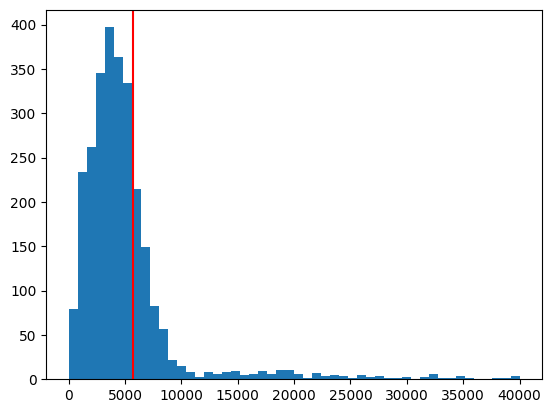

In [63]:
#plot histogram of claim amount
plt.hist(data_with_data['CLM_AMT'],bins=50,range=(0,40000))
#add line
plt.axvline(data_with_data['CLM_AMT'].mean(),color='red',label='mean')


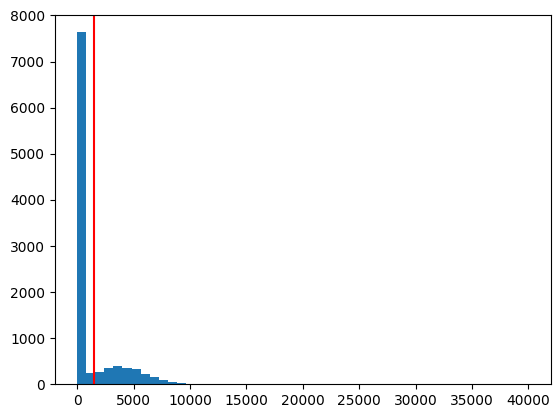

In [20]:
plt.hist(df['CLM_AMT'],bins=50,range=(0,40000))
#add line
plt.axvline(df['CLM_AMT'].mean(),color='red',label='mean')

/var/folders/t6/1kryld716d33z79v3k21z5_c0000gn/T/ipykernel_21897/3049619363.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_with_data['CLM_AMT'],shade=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='CLM_AMT', ylabel='Density'>

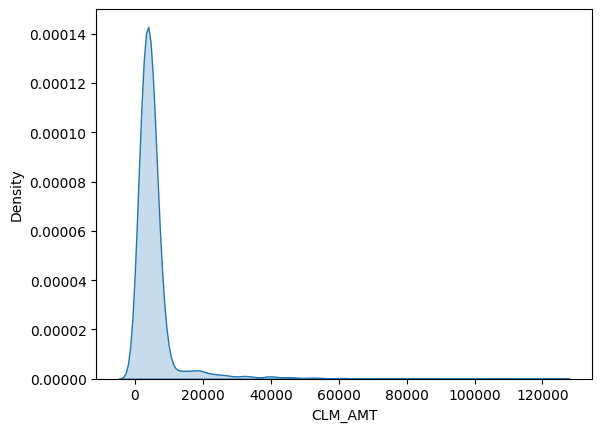

In [64]:
#plot density curve of claim amount
sns.kdeplot(data_with_data['CLM_AMT'],shade=True)

/var/folders/t6/1kryld716d33z79v3k21z5_c0000gn/T/ipykernel_21897/3629315813.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['CLM_AMT'],shade=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='CLM_AMT', ylabel='Density'>

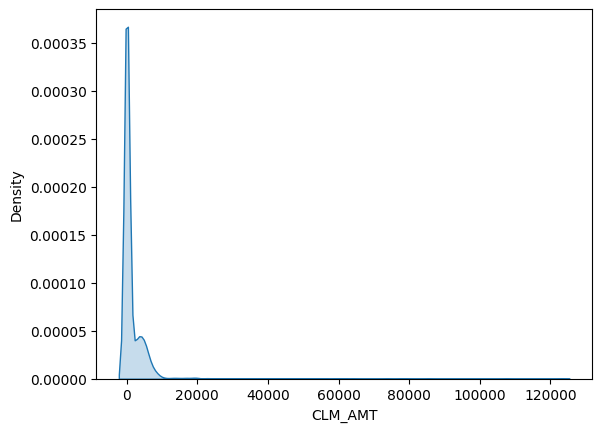

In [22]:
#plot density curve of claim amount
sns.kdeplot(df['CLM_AMT'],shade=True)

/var/folders/t6/1kryld716d33z79v3k21z5_c0000gn/T/ipykernel_21897/2322635468.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(np.log(data_with_data['CLM_AMT']),shade=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


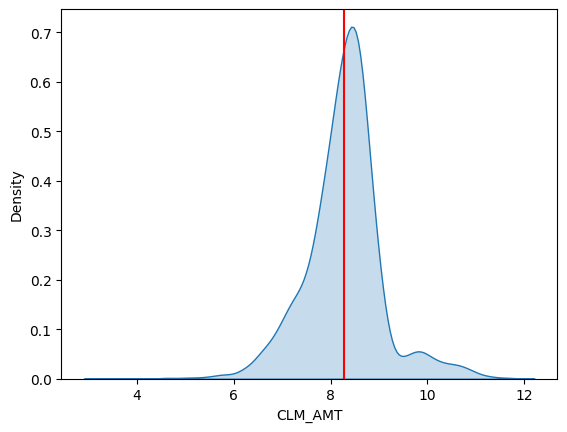

In [65]:
#plot density curve of lognoRMAL
sns.kdeplot(np.log(data_with_data['CLM_AMT']),shade=True)
#ADD MEAN LINE
plt.axvline(np.log(data_with_data['CLM_AMT']).mean(),color='red',label='mean')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/t6/1kryld716d33z79v3k21z5_c0000gn/T/ipykernel_21897/3018055652.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(np.log(df['CLM_AMT']),shade=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf

(1.0, 15.0)

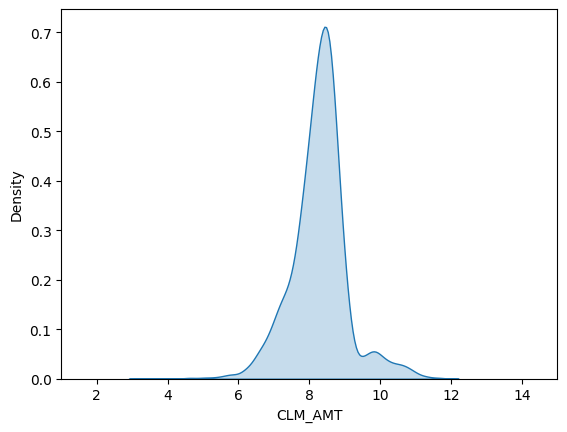

In [66]:
#plot density curve of lognoRMAL
sns.kdeplot(np.log(df['CLM_AMT']),shade=True)
#ADD MEAN LINE
plt.axvline(np.log(df['CLM_AMT']).mean(),color='red',label='mean')
plt.xlim(left=1, right=15)

## ^ weibull or log normal or gamma

{'whiskers': [<matplotlib.lines.Line2D at 0x1629c2190>,
 'caps': [<matplotlib.lines.Line2D at 0x1629d2e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x16291f310>],
 'medians': [<matplotlib.lines.Line2D at 0x1629d3f10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1629e0710>],
 'means': []}

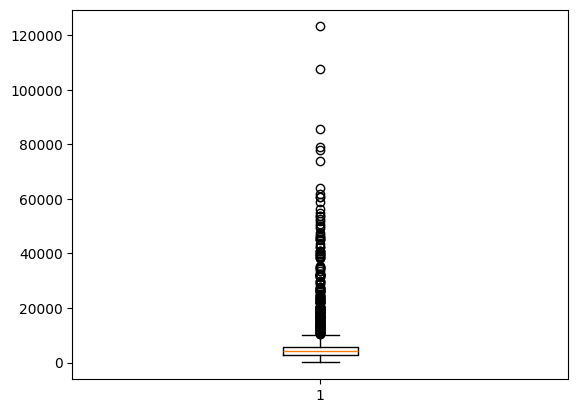

In [29]:
plt.boxplot(data_with_data['CLM_AMT'])


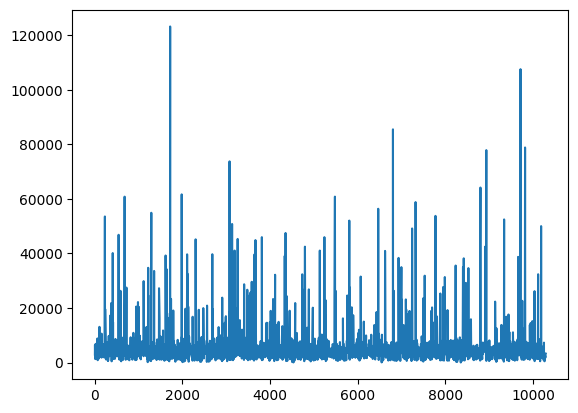

In [38]:
#LINE PLOT OF CLM AMT
plt.plot(data_with_data['CLM_AMT'])

# reference codes for fitting < IGNORE >

In [19]:
# import numpy as np
# from scipy.stats import lognorm
# from scipy.optimize import minimize


In [ ]:
# def log_likelihood(params, data):
#     mu, sigma = params
#     return -np.sum(np.log(lognorm.pdf(data, sigma, scale=np.exp(mu))))

# initial_guess = [0, 1]  # Initial guess for mu and sigma

# result = minimize(log_likelihood, initial_guess, args=(data,), method='L-BFGS-B')
# mu_mle, sigma_mle = result.x
# # Use the estimated parameters to fit the lognormal distribution
# fitted_distribution = lognorm(sigma_mle, scale=np.exp(mu_mle))

# # Generate values for the PDF for plotting
# x = np.linspace(min(data), max(data), 1000)
# pdf_values = fitted_distribution.pdf(x)


In [ ]:
# import matplotlib.pyplot as plt

# # Plot histogram of the data
# plt.hist(data, bins=30, density=True, alpha=0.7, label='Data')

# # Plot the fitted lognormal distribution
# plt.plot(x, pdf_values, 'r-', label='Lognormal Fit')

# plt.title('Lognormal Distribution Fit')
# plt.xlabel('Variable')
# plt.ylabel('Probability Density')
# plt.legend()
# plt.show()
